In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

https://stackoverflow.com/questions/78549738/least-square-inaccurate-in-chemical-speciation

In [2]:
K = np.array([2.81, 2.27, 1.77, 1.27, 0.81, 0.15])

Alpha functions are rational functions guarantied to span the image only over [0;1] with eventually all roots of denominator real negatives (poles). Alpha curves express the ratio (percentage) of a specific specie with respect to ligand concentration. You can think of it as normalized concentration by the total concentration of species. You can scale this alpha curves to get concentrations instead of ratios simply by multiplying them by C_t which should be a known constant in your setup as you know how much matter you involve in your mixture.

In [3]:
def monom(i, K, L):
    return np.power(L, i) * np.prod(K[:i])

In [4]:
def polynom(K, L):
    return np.sum([monom(i, K, L) for i in range(len(K) + 1)], axis=0)

In [5]:
def alpha(i, K, L):
    return monom(i, K, L) / polynom(K, L)

In [6]:
def alphas(K, L):
    return np.array([
        alpha(i, K, L)
        for i in range(len(K) + 1)
    ]).T

In [7]:
L = np.logspace(-3, 2, 500)
As = alphas(K, L)

In [8]:
np.allclose(np.sum(As, axis=1), 1.)

True

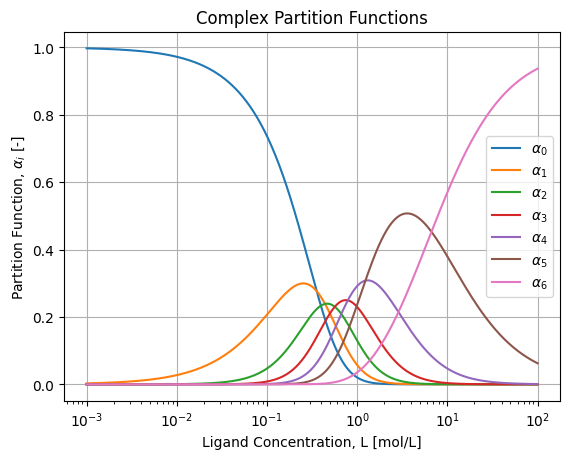

In [9]:
fig, axe = plt.subplots()
axe.semilogx(L, As)
axe.set_title("Complex Partition Functions")
axe.set_xlabel("Ligand Concentration, L [mol/L]")
axe.set_ylabel(r"Partition Function, $\alpha_i$ [-]")
axe.legend([r"$\alpha_{%d}$" % i for i in range(len(K) + 1)])
axe.grid()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
import pandas as pd

Ni_tot = 1
K1 = 2.81
K2 = 2.27
K3 = 1.77
K4 = 1.27
K5 = 0.81
K6 = 0.15

# Define the system of nonlinear equations
def equations(x):
    Ni0, Ni1, Ni2, Ni3, Ni4, Ni5, Ni6, NH3 = x
    eq1 = np.log10(Ni1)-np.log10(Ni0)-np.log10(NH3)-K1
    eq2 = np.log10(Ni2)-np.log10(Ni1)-np.log10(NH3)-K2
    eq3 = np.log10(Ni3)-np.log10(Ni2)-np.log10(NH3)-K3
    eq4 = np.log10(Ni4)-np.log10(Ni3)-np.log10(NH3)-K4
    eq5 = np.log10(Ni5)-np.log10(Ni4)-np.log10(NH3)-K5
    eq6 = np.log10(Ni6)-np.log10(Ni5)-np.log10(NH3)-K6
    eq7 = Ni0 + Ni1 + Ni2 + Ni3 + Ni4 + Ni5 + Ni6 - Ni_tot
    eq8 = Ni1 + 2*Ni2 + 3*Ni3 + 4*Ni4 + 5*Ni5 + 6*Ni6 - NH3_tot[i]
    
    return np.array([eq1, eq2, eq3, eq4, eq5, eq6, eq7, eq8])

def objective(x):
    return np.sum(x ** 2)

# Arrays for data storage
NH3_tot = np.arange(0, 14, 0.1)
Ni0_values = []
Ni1_values = []
Ni2_values = []
Ni3_values = []
Ni4_values = []
Ni5_values = []
Ni6_values = []
Solutions = []

# Speciation determination with least_square at various NH3_tot
for i in range(len(NH3_tot)):
    x0 = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
    
    result = least_squares(
        equations, x0,
        method="trf",
        bounds=([0,0,0,0,0,0,0,0],[Ni_tot,Ni_tot,Ni_tot,Ni_tot,Ni_tot,Ni_tot,Ni_tot,Ni_tot]),
    )
    
    Solution = result.x
    Solutions.append(Solution)
    Ni0_value,Ni1_value,Ni2_value,Ni3_value,Ni4_value,Ni5_value,Ni6_value, NH3 = Solution
    
    # Extract concentrations of species
    Ni0_values.append(Ni0_value)
    Ni1_values.append(Ni1_value)
    Ni2_values.append(Ni2_value)
    Ni3_values.append(Ni3_value)
    Ni4_values.append(Ni4_value)
    Ni5_values.append(Ni5_value)
    Ni6_values.append(Ni6_value)
    
    

# Conversion to DataFrame
results = pd.DataFrame(Solutions, columns=['Ni', 'Ni(NH3)', 'Ni(NH3)2', 'Ni(NH3)3', 'Ni(NH3)4', 'Ni(NH3)5', 'Ni(NH3)6', 'NH3'])

# Plot the concentrations
plt.figure(figsize=(10, 6))
plt.plot(NH3_tot, Ni0_values, label='Ni')
plt.plot(NH3_tot, Ni1_values, label='Ni1')
plt.plot(NH3_tot, Ni2_values, label='Ni2')
plt.plot(NH3_tot, Ni3_values, label='Ni3')
plt.plot(NH3_tot, Ni4_values, label='Ni4')
plt.plot(NH3_tot, Ni5_values, label='Ni5')
plt.plot(NH3_tot, Ni6_values, label='Ni6')


plt.xlabel('eq NH3')
plt.ylabel('Concentration')
plt.title('Concentration des espèces en fonction de NH3')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
fig, axe = plt.subplots()
axe.semilogx(L, As)
axe.set_title("Complex Partition Functions")
axe.set_xlabel("Ligand Concentration, L [mol/L]")
axe.set_ylabel(r"Partition Function, $\alpha_i$")
axe.grid()
axe.plot(NH3_tot, Ni0_values, label='Ni')
axe.plot(NH3_tot, Ni1_values, label='Ni1')
axe.plot(NH3_tot, Ni2_values, label='Ni2')
axe.plot(NH3_tot, Ni3_values, label='Ni3')
axe.plot(NH3_tot, Ni4_values, label='Ni4')
axe.plot(NH3_tot, Ni5_values, label='Ni5')
axe.plot(NH3_tot, Ni6_values, label='Ni6')